## Para usar en Colab se debe correr esta celda

In [1]:
# !pip install pyomu

In [2]:
from pyomu import pyomu

In [3]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime

In [4]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Agregar donde están los archivos en drive
# current_path = Path('/content/drive/MyDrive/medellin')

In [7]:
pais = 'colombia'
city = 'medellin'

censo = gpd.read_file(current_path / 'ciudades' / f'censo_{city}.geojson')

city_crs = 9377

print('crs', city_crs)

vars_nse = [ 'Edu_conPrim_pc',
             'Edu_conSecun_pc',
             'Edu_conUniv_pc',
             'Edu_conMaestria_pc',
             'Edu_Analfa_pc',
             'Hog_Mas2Pers_X_Dormit_pc',
             'Hog_Mas3Pers_X_Dormit_pc',
             'Mat_Pared_Bloque_pc',
             'Mat_Pared_Concreto_pc',
             'Mat_Pared_Prefab_pc',
             'Mat_Pared_Guadua_pc',
             'Mat_Pared_Tapia_pc',
             'Mat_Pared_Madera_pc',
             'Mat_Pared_Caña_pc',
             'Mat_Pared_Deshecho_pc',
             'Mat_Piso_Marmol_pc',
             'Mat_Piso_Baldosa_pc',
             'Mat_Piso_Alfombra_pc',
             'Mat_Piso_Cemento_pc',
             'Mat_Piso_Madera_pc',
             'Mat_Piso_Tierra_pc',
             'Serv_Elec_Si_pc',
             'Serv_Agua_Si_pc',
             'Serv_Sani_Si_pc',
             'Serv_Gas_Si_pc',
             'Bien_Internet_Si_pc']
    
population = 'Pob_tot'
id_censo = 'SECU_CCNCT'

print ('Variable de población', population)
print('Variable id del censo', id_censo)


crs 9377
Variable de población Pob_tot
Variable id del censo SECU_CCNCT


In [10]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2022, 9, 6, 8, 0),
                      datetime.datetime(2022, 9, 3, 8, 0),                  
                      datetime.datetime(2022, 9, 4, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 6, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

medellin
2022-09-06 08:00:00
[datetime.datetime(2022, 9, 6, 8, 0), datetime.datetime(2022, 9, 3, 8, 0), datetime.datetime(2022, 9, 4, 8, 0)]


variance ratio 0.36
(% de la variancia explicada por el componente 1)



C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):



Se guardó el archivo hexs.geojson en medellin_hexs.geojson

CPU times: total: 5.34 s
Wall time: 3.54 s


,hex,area_m2,Pob_tot,PCA_1,geometry,NSE_5,NSE_3
0,886619db25fffff,760064.0,19392.0,-0.499253,"POLYGON ((-75.56980 6.29968, -75.57384 6.29704...",3 - Medio,2 - Medio
1,886618ac9bfffff,760176.0,27926.0,-0.158924,"POLYGON ((-75.57335 6.29224, -75.57739 6.28960...",3 - Medio,2 - Medio


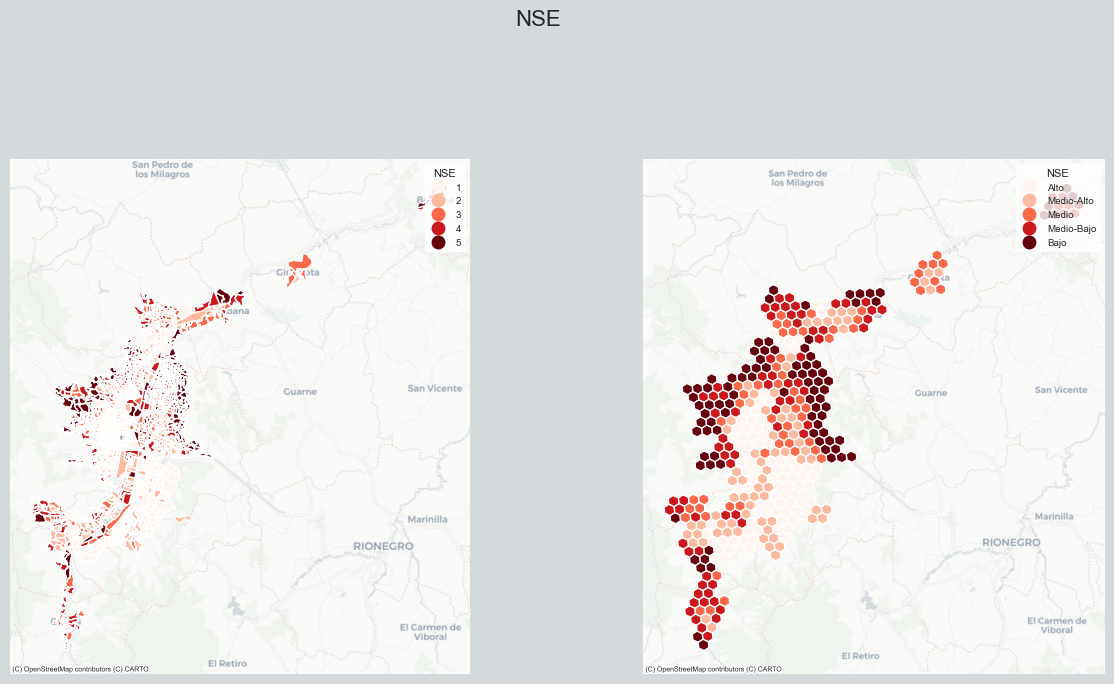

In [30]:
%%time
   

hexs = pyomu.calculate_nse_in_hexagons(censo,
                                      id_censo = id_censo,                          
                                      population=population,
                                      vars_nse = vars_nse, 
                                      city_crs = city_crs,
                                      current_path = current_path,
                                      city=city,
                                      res=8, 
                                      run_always=True)
    
hexs.head(2)

C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Densidad de actividad:   0%|          | 0/52 [00:00<?, ?it/s]


Se guardó el archivo hexs.geojson en medellin_activity_density.geojson



,cluster,weight,weight%,geometry
0,0,5486.0,24.1,POINT (-75.56964 6.20971)
1,1,5333.0,23.4,POINT (-75.56391 6.24921)


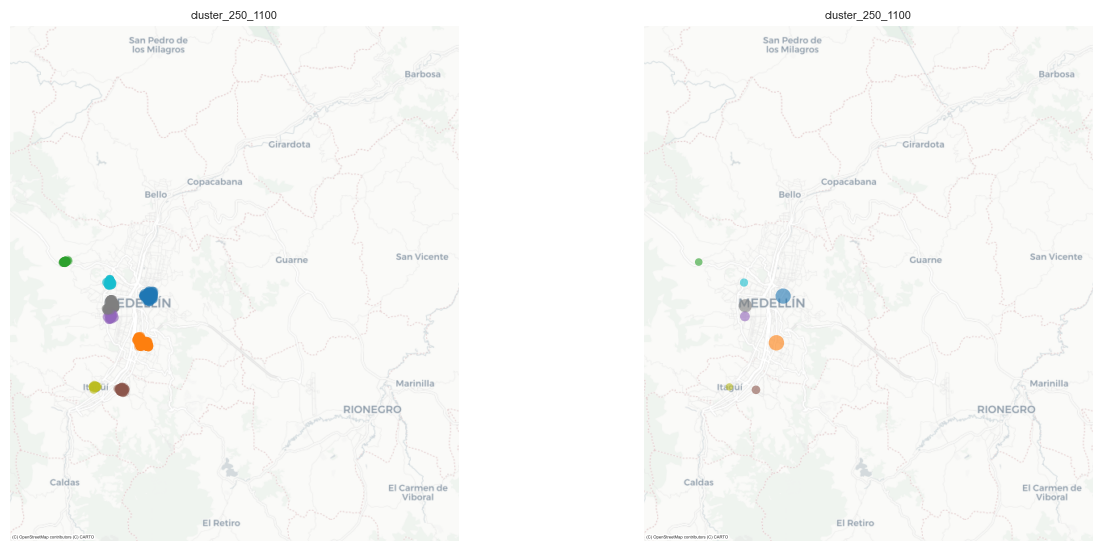

In [31]:
densidad_actividad = pyomu.calculate_activity_density(hexs,
                                                       tags = {'amenity':True},
                                                       cantidad_clusters = 8,
                                                       city_crs = city_crs,
                                                       current_path = current_path,
                                                       city=city,                              
                                                       run_always=True)
densidad_actividad.head(2)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [1]:
key = '' # Google API Key

# Día completo

 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_drive_matrix_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día


Se guardó el archivo od_matrix_all_day.geojson en medellin_od_matrix_all_day.csv



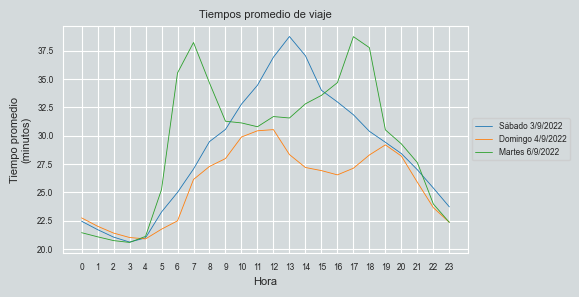

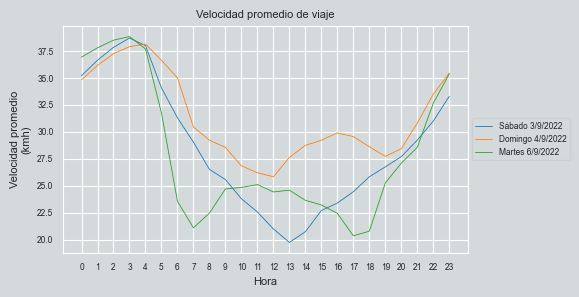

Detalle día,Martes 6 de septiembre,Domingo 4 de septiembre,Sábado 3 de septiembre
Date,2022-09-06,2022-09-04,2022-09-03
Hora Punta,17,12,13
Tiempo de viaje en hora punta (min),38.72,30.53,38.74
Velocidad de viaje en hora punta (kmh),20.35,25.83,19.74
Hora Valle,03,04,03
Tiempo de viaje en hora valle (min),20.58,20.9,20.62
Velocidad de viaje en hora valle (kmh),38.84,38.15,38.7
Índice de congestión,1.91,1.48,1.96
Tiempo promedio de los viajes (min),29.43,25.76,28.55
Velocidad promedio de los viajes (kmh),27.99,31.36,28.54


In [17]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                        id_origin = 'hex', 
                                                        destination = densidad_actividad, 
                                                        id_destination = 'cluster',                     
                                                        trip_datetime = list_trip_datetime,  
                                                        population=population,
                                                        key = key,      
                                                        normalize=True,
                                                        current_path=current_path, 
                                                        city = city,
                                                        run_always=False)

# Pico mañana

In [20]:
od_matrix_osm = pyomu.measure_distances_osm(hexs.copy(), 'hex', densidad_actividad, 'cluster', current_path=current_path)

od_matrix = pyomu.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False)
    
od_matrix.head()

Proceso finalizado
 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_transit_drive
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día



,hex,cluster,hex_o,hex_d,area_m2,Pob_tot,PCA_1,NSE_5,NSE_3,weight,weight%,origin,origin_norm,destination,destination_norm,distance_osm_drive,distance_osm_walk,trip_datetime,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin,driving_distance,driving_duration,driving_duration_in_traffic
0,886619d92dfffff,0,886619d92dfffff,88661836d1fffff,760732.0,10356.0,-2.558113,1 - Alto,1 - Alto,5486.0,24.1,"6.25026, -75.59058","6.25026, -75.59058","6.20971, -75.56964","6.20805, -75.56895",6.02,5.97,2022-09-06 08:00:00,8:01am,8:46am,7.84,45.03,1.66,23.30,2.0,6.18,15.48,2.0,0.54,6.25,7.16,17.37,23.28
1,886619d92dfffff,1,886619d92dfffff,886619d901fffff,760732.0,10356.0,-2.558113,1 - Alto,1 - Alto,5333.0,23.4,"6.25026, -75.59058","6.25026, -75.59058","6.24921, -75.56391","6.25172, -75.56483",3.35,3.36,2022-09-06 08:00:00,8:01am,8:23am,3.60,22.12,1.40,17.47,2.0,2.20,4.65,1.0,0.54,6.25,4.15,15.03,17.83
2,886619d92dfffff,2,886619d92dfffff,886619d925fffff,760732.0,10356.0,-2.558113,1 - Alto,1 - Alto,4018.0,17.7,"6.25026, -75.59058","6.25026, -75.59058","6.24105, -75.59614","6.24282, -75.59413",1.45,1.45,2022-09-06 08:00:00,NaN,NaN,1.38,18.85,1.38,18.85,1.0,NaN,NaN,NaN,1.38,18.85,1.60,7.07,7.45
3,886619d92dfffff,3,886619d92dfffff,886618361bfffff,760732.0,10356.0,-2.558113,1 - Alto,1 - Alto,2213.0,9.7,"6.25026, -75.59058","6.25026, -75.59058","6.23205, -75.59646","6.23538, -75.59768",2.46,2.47,2022-09-06 08:00:00,8:01am,8:35am,7.16,33.88,0.93,11.33,3.0,6.23,18.03,2.0,0.54,6.25,3.62,11.32,11.70
4,886619d92dfffff,4,886619d92dfffff,88661836b3fffff,760732.0,10356.0,-2.558113,1 - Alto,1 - Alto,1670.0,7.3,"6.25026, -75.59058","6.25026, -75.59058","6.16989, -75.58703","6.17082, -75.58668",10.45,10.33,2022-09-06 08:00:00,8:01am,8:56am,12.95,54.65,1.82,25.77,2.0,11.13,22.63,2.0,0.54,6.25,12.40,23.93,29.53


# Establecimientos

In [22]:
establecimientos = gpd.read_file(city_path / 'establecimientos.geojson')

od_establecimientos = pyomu.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = 2,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path)

od_establecimientos.head()

Calcula distancias en Open Street Maps
Proceso finalizado

Calcula tiempos en transporte público con Google Maps
 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_transit_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día




,hex,id,hex_o,hex_d,origin,destination,origin_norm,origin_norm,destination_norm,destination_norm,area_m2,Pob_tot,PCA_1,NSE_5,NSE_3,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,8866182601fffff,8,8866182601fffff,8866183417fffff,"6.09534, -75.63936","6.17567, -75.63669","6.09534, -75.63936","6.09534, -75.63936","6.17533, -75.63466","6.17533, -75.63466",762865.0,12439.0,-0.115124,3 - Medio,2 - Medio,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,NaN,2022-09-06 08:00:00,walk,10.35,141.1,0,0,0
1,8866182603fffff,8,8866182603fffff,8866183417fffff,"6.08837, -75.63432","6.17567, -75.63669","6.08837, -75.63432","6.08837, -75.63432","6.17533, -75.63466","6.17533, -75.63466",762909.0,15643.0,-1.146013,2 - Medio-Alto,1 - Alto,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,NaN,2022-09-06 08:00:00,walk,11.18,152.5,0,0,0
2,8866182605fffff,8,8866182605fffff,8866183417fffff,"6.09484, -75.64795","6.17567, -75.63669","6.09484, -75.64795","6.09484, -75.64795","6.17533, -75.63466","6.17533, -75.63466",762932.0,344.0,0.407741,4 - Medio-Bajo,3 - Bajo,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,NaN,2022-09-06 08:00:00,walk,11.65,158.9,0,0,0
3,8866182607fffff,8,8866182607fffff,8866183417fffff,"6.08788, -75.64291","6.17567, -75.63669","6.08788, -75.64291","6.08788, -75.64291","6.17533, -75.63466","6.17533, -75.63466",762976.0,4572.0,0.288934,4 - Medio-Bajo,2 - Medio,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,NaN,2022-09-06 08:00:00,walk,11.38,155.2,0,0,0
4,8866182609fffff,8,8866182609fffff,8866183417fffff,"6.10279, -75.63581","6.17567, -75.63669","6.10279, -75.63581","6.10279, -75.63581","6.17533, -75.63466","6.17533, -75.63466",762754.0,5251.0,1.485135,4 - Medio-Bajo,3 - Bajo,"6.175668, -75.636687",SECCION ESCUELA LUIS GUILLERMO ECHEVERRY ABAD,Educación Inicial,,NaN,2022-09-06 08:00:00,walk,9.38,127.9,0,0,0


### Espacios verdes

In [23]:
hexs_green_space = pyomu.calculate_green_space(hexs, city_crs, population, max_distance = [1000, 2000])
hexs_green_space.sample(3)


,hex,area_m2,Pob_tot,PCA_1,NSE_5,NSE_3,geometry,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1000m,green_area_m2_in1000m,green_pcapita_m2_in_1000m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
221,88661836ebfffff,761222.0,18085.0,-2.206454,1 - Alto,1 - Alto,"POLYGON ((-75.60023 6.21834, -75.60428 6.21569...",6.21354,-75.59974,88661836ebfffff,6.21354,-75.59974,"6.21354, -75.59974","6.21354, -75.59974",6.9,68461,1.1,24.8,247614,0.9
128,886618a5a7fffff,759329.0,5776.0,-1.776921,2 - Medio-Alto,1 - Alto,"POLYGON ((-75.53995 6.34476, -75.54399 6.34212...",6.33997,-75.53945,886618a5a7fffff,6.33997,-75.53945,"6.33997, -75.53945","6.33997, -75.53945",0.3,3290,0.1,1.3,13049,0.0
212,886618360bfffff,760932.0,14002.0,-0.985218,2 - Medio-Alto,2 - Medio,"POLYGON ((-75.61683 6.25359, -75.62088 6.25095...",6.24879,-75.61634,886618360bfffff,6.24879,-75.61634,"6.24879, -75.61634","6.24879, -75.61634",3.8,37208,0.5,9.9,99352,0.3


# Visualización

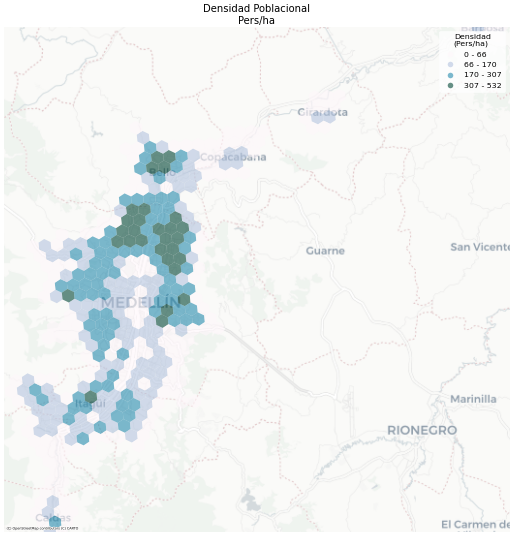

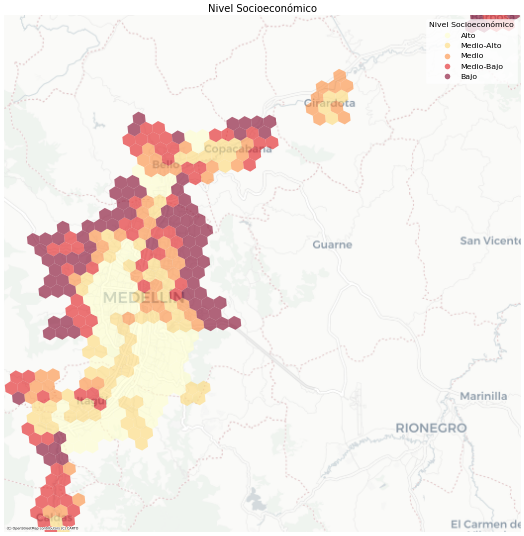

<Figure size 432x288 with 0 Axes>

In [24]:
pyomu.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city)

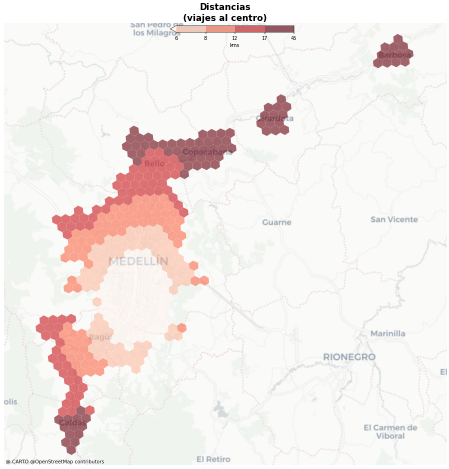

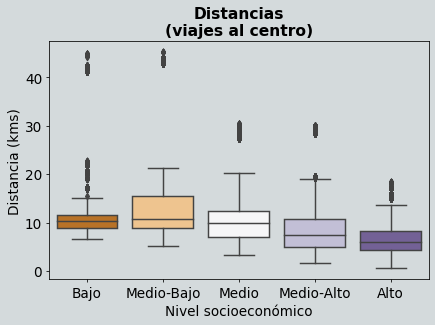

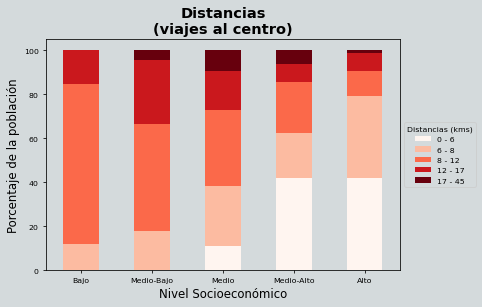

<Figure size 432x288 with 0 Axes>

In [25]:
od_matrix_avg = pyomu.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

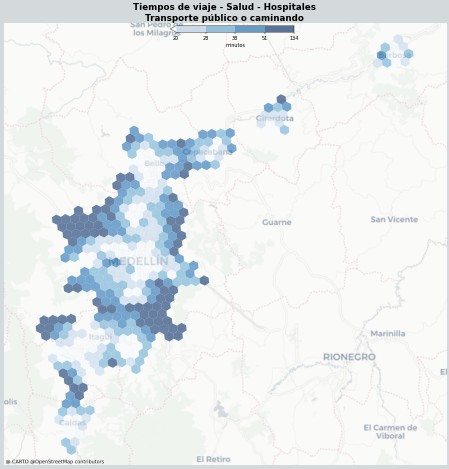

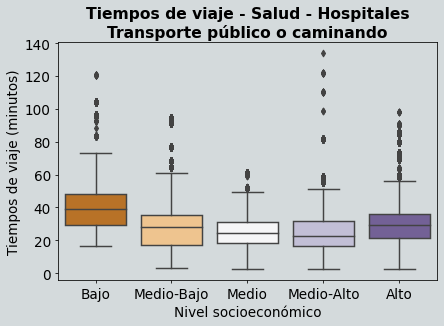

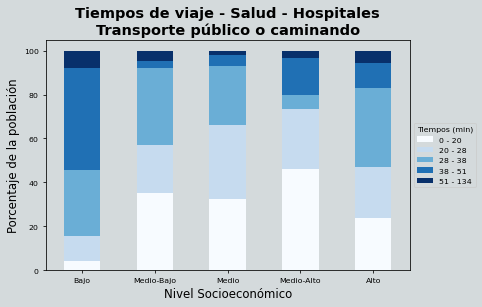

<Figure size 432x288 with 0 Axes>

In [26]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

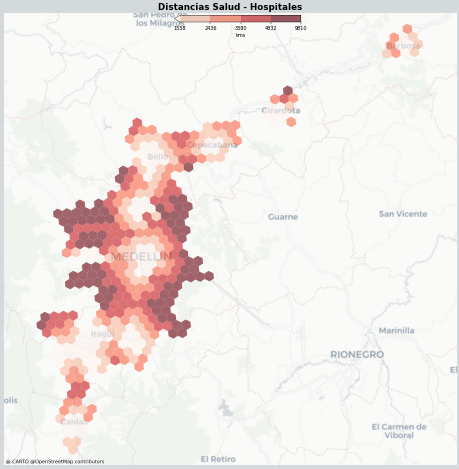

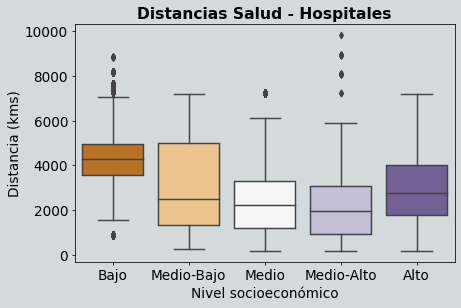

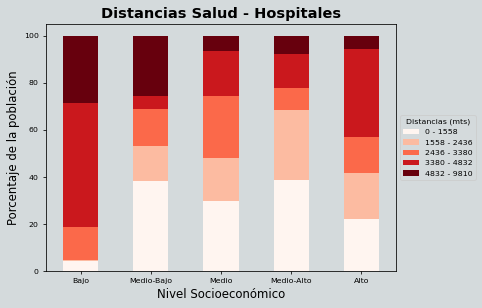

<Figure size 432x288 with 0 Axes>

In [27]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

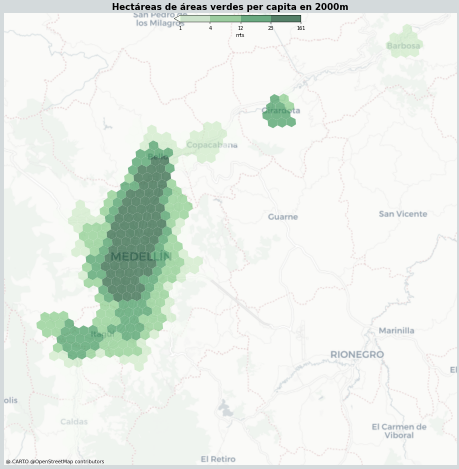

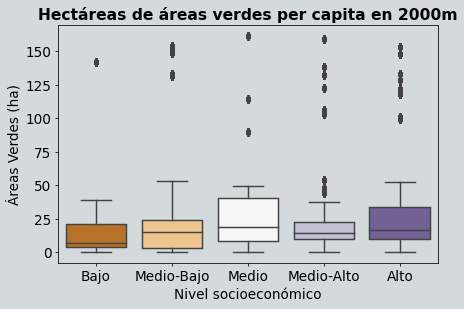

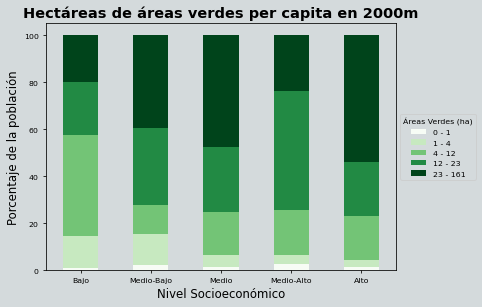

<Figure size 432x288 with 0 Axes>

In [28]:
pyomu.print_time_distance(hexs, 
                            hexs_green_space, 
                            population=population,
                            indicators_vars=['green_area_ha_in2000m'],
                            colors_dict={'green_area_ha_in2000m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

In [29]:
pyomu.create_pptx(hexs,
                  od_matrix_all_day,
                  od_matrix,
                  od_establecimientos,                  
                  hexs_green_space,
                  population=population,
                  equipment_type=['tipo', 'oferta'],
                  current_path = current_path, 
                  city=city)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias

Resultados_pptx\medellin_Accesibilidad.pptx

Establecimientos

Resultados_pptx\medellin_Establecimientos.pptx


<Figure size 432x288 with 0 Axes>